# Part I - Laptop Dataset
## by Terri-Lee Meyer

## 1. Introduction:
The first laptop was produced in 1981. Laptops have been around for over 3 decades but the functionality of a laptop has evolved to fit consumer needs. Each consumer presents different needs - this brings about multiple variations of a laptop and the various brands that produce them. 

Laptops are made up of features that can be make or break it in the market. It is a great question if these specifications contribute greatly to the price and weight  of the laptop or determining the overall performance for the user. Given the large market for laptops and the different categories taylored to the user, comparisons of the categories to the other features will be made. The overall features of a laptop could in return affect each other - making a balance to be desired in order to find that goldilocks area in the perfect laptop for each category.

There are a great number of specifications to consider when choosing a laptop. However, the focus on this analysis will be put of the categorisation of laptops, CPU speed, RAM size, screen type and the processors used. During the analysis, multiple relationships will be tested and distributions shown until finding the best visualisations to convey the answers.

*Laptop dataset updated most recently on Jul 5, 2019 on Github*

## 2. Preliminary Wrangling


### 2.1 Import Packages:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

%matplotlib inline

#libraries to help extract dataset from github
import requests
import io


### 2.2 Load dataset:

In [2]:
# Downloading the raw csv file from the GitHub public account
url = "https://raw.githubusercontent.com/37Degrees/DataSets/master/laptops.csv" # Make sure the url is the raw version of the file on GitHub
response = requests.get(url).content



# Reading downloaded content & turning it into a dataframe
laptops = pd.read_csv(io.StringIO(response.decode('iso-8859-1')))

### 2.3 Explore dataset:

In [3]:
#check dataframe
laptops.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [4]:
#find amount of columns and rows of dataframe
laptops.shape

(1303, 13)

In [5]:
#find total duplicates
laptops.duplicated().sum()

28

In [6]:
#find total nulls in each column
laptops.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price (Euros)                 0
dtype: int64

In [7]:
#check the data types of all columns
laptops.dtypes

Manufacturer                object
Model Name                  object
Category                    object
Screen Size                 object
Screen                      object
CPU                         object
RAM                         object
 Storage                    object
GPU                         object
Operating System            object
Operating System Version    object
Weight                      object
Price (Euros)               object
dtype: object

### 2.4 Data Cleaning Issues:
1. Split CPU column into 3 new columns CPU Brand, Name and Speed
2. Split CPU column into 2 new columns CPU Brand and Name
3. Create Screen Type column
4. Remove duplicate laptops
5. Rename column headings to lowercase with underscores replacing spaces between words, remove any unnecessary spaces
6. Remove the units from the weight column
7. Replace commas in price column with periods
8. Order the data by the RAM size:
9. Convert cpu_speed, price and weight columns to floats and convert rest of columns from object to string
10. Remove rows that contain nulls from dataframe

#### 2.4.1 Split CPU column into 3 new columns CPU Brand, Name and Speed:

In [8]:
#create new column for the CPU brand
#extracting first word from CPU column
laptops[['CPU Brand', 'CPU']] = laptops['CPU'].str.split(' ', n=1, expand=True)

In [9]:
#use regex to extract the speed of the CPU
laptops['CPU Speed'] = laptops['CPU'].str.extract('([0-9][.]*[0-9]+[a-zA-Z]{3})')

In [10]:
#create new column that takes the remainder of the CPU column and eliminates any characters from the SPU Speed column
laptops['CPU Name'] = laptops.apply(lambda row : row['CPU'].replace(str(row['CPU Speed']), ''), axis=1)

In [11]:
#CPU column is no longer needed and can be dropped
laptops.drop(columns = 'CPU', inplace = True)

In [12]:
#remove the GHz units from the CPU speed column
laptops['CPU Speed'] = laptops['CPU Speed'].str.replace('[a-zA-Z]+','')

C:\Users\terri\anaconda3\envs\jupiter_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


#### 2.4.2 Split CPU column into 2 new columns CPU Brand and Name:

In [13]:
#similar to CPU columns
laptops[['GPU Brand', 'GPU']] = laptops['GPU'].str.split(' ', n=1, expand=True)

In [14]:
laptops['GPU Name'] = laptops.apply(lambda row : row['GPU'].replace(str(row['GPU Brand']), ''), axis=1)

In [15]:
laptops.drop(columns = 'GPU', inplace = True)

#### 2.4.3 Create Screen Type column:

In [16]:
#split screen type in a new column

#check all indices in the Screen column
for index in laptops['Screen'].index:
    if 'Touchscreen' in laptops.loc[index,'Screen']:
        laptops.loc[index, 'Screen Type'] ='Touchscreen'
    else:
        laptops.loc[index, 'Screen Type'] = 'Not Touchscreen'

#### 2.4.4 Remove duplicate laptops:

In [17]:
#checking duplicate row
laptops.sort_values(by = 'Model Name')[laptops.duplicated() == True].shape

C:\Users\terri\anaconda3\envs\jupiter_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(28, 17)

In [18]:
laptops.drop_duplicates(inplace = True, keep='first')

In [19]:
laptops.duplicated().sum()

0

#### 2.4.5 Rename column headings to lowercase with underscores replacing spaces between words, remove any unnecessary spaces:

In [20]:
laptops.rename(columns = {' Storage':'Storage'}, inplace = True)

In [21]:
laptops.rename(columns = lambda x: x.strip().lower().replace(" ","_"), inplace = True)

In [22]:
#remove euros from price column
laptops.rename(columns = {'price_(euros)':'price'}, inplace = True)

#### 2.4.6 Remove the units from the weight column:

In [23]:
laptops['weight'] = laptops['weight'].str.replace('[a-zA-Z]', '')

C:\Users\terri\anaconda3\envs\jupiter_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [24]:
laptops.weight

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1270     1.8
1271     1.3
1272     1.5
1273    2.19
1274     2.2
Name: weight, Length: 1275, dtype: object

#### 2.4.7 Replace commas in price column with periods:

In [25]:
laptops.price = laptops.price.str.replace(',','.')

#### 2.4.8 Order the data by the RAM size:

In [26]:
#created a copy of ram column
laptops['ram_num'] = laptops['ram']
#remove all letters from new column
laptops['ram_num'] = laptops['ram_num'].str.replace('[a-zA-Z]', '')

#convert the ram_num column to integers
laptops.ram_num = laptops.ram_num.astype(int)

#order the dataframe according to the ram_space
laptops.sort_values(by = 'ram_num', inplace = True, ascending = True)
#drop the new column since the ram column will be ordered correctly 
laptops.drop(columns = 'ram_num', inplace = True)

C:\Users\terri\anaconda3\envs\jupiter_env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


#### 2.4.9 Convert cpu_speed, price and weight columns to floats; and convert rest of columns from object to string:

In [27]:
#converting columns from objects to floats
float_columns = ['price', 
                 'weight',
                 'cpu_speed']
for column in float_columns:
    laptops[column] = laptops[column].astype('float')

In [28]:
#converting columns from objects to strings
string_columns = ['manufacturer', 
           'model_name', 
           'category', 
           'screen',
           'ram',
           'screen_size',
           'cpu_brand',
           'cpu_name',
           'storage', 
           'gpu_brand',
           'gpu_name', 
           'operating_system',
           'operating_system_version',
           'screen_type']
for column in string_columns:
    laptops[column] = laptops[column].astype('string')

In [29]:
#testing it worked
laptops.dtypes

manufacturer                 string
model_name                   string
category                     string
screen_size                  string
screen                       string
ram                          string
storage                      string
operating_system             string
operating_system_version     string
weight                      float64
price                       float64
cpu_brand                    string
cpu_speed                   float64
cpu_name                     string
gpu_brand                    string
gpu_name                     string
screen_type                  string
dtype: object

#### 2.4.10 Remove rows that contain nulls from dataframe:

In [30]:
#rename the nulls as operating_system_version
laptops.dropna(axis = 0, inplace = True)

### 2.5 Store Cleaned Dataset:

In [31]:
laptops.to_csv(r'laptops-cleaned.csv', index = False)

### What is the structure of your dataset?

- The dataset initially contained 1303 observations with 13 columns
- There are 17 columns with 1043 observations after cleaning to make the dataset usable for my analysis
- 3 numerical columns:
> - weight in kg
> - cpu_speed in GHz
> - price in Euros
- 14 categorical columns:
> - manufacturer: manufacturer of the laptop
> - model_name: distinguishes the model of the laptops
> - category: categorizes the type of laptop
> - screen_size: size of the laptop screen (left as a string)
> - screen: type of screen components
> - ram: size of laptop ram (left as a string)
> - storage: storage available on laptop as well as type of storage offered
> - operating_system: Windows or Mac OS
> - operating_system_version: version provided on laptop model
> - cpu_brand: central processing unit make
> - cpu_name: further distinguishes the CPU components
> - gpu_brand: graphics processing unit make
> - gpu_name:further distinguishes the GPU components
> - touchscreen: distinguishes if the laptop is 'Touchscreen' or 'Not Touchscreen'

### What is/are the main feature(s) of interest in your dataset?

- What are the top 5 manufacturers producing the most laptops?
- Do these top 5 manufacturers produce laptops in each category? (variation for increased target market)
- How are price, weight and CPU speed are distributed according to the following:
> - laptop category
> - CPU and GPU
> - Screen Size
> - Screen Type
> - RAM size
- Does the CPU and GPU of the laptops influence the price?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- CPU aspects and GPU brand 
- Weight and Price of laptops
- Laptop category distribution
- Screen size
- RAM size

## 3. Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


- Let's start by looking at the descriptive statistics of the numerical columns: weight, price and cpu_speed:

In [32]:
laptops.describe()

,weight,price,cpu_speed
count,1043.000000,1043.000000,1043.000000
mean,2.039664,1238.943250,2.337699
std,0.705923,703.532066,0.492504
min,0.690000,191.900000,0.900000
25%,1.480000,739.500000,2.200000
50%,2.000000,1099.000000,2.500000
75%,2.325000,1599.500000,2.700000
max,4.700000,6099.000000,3.600000


- Moving onto the operating systems:

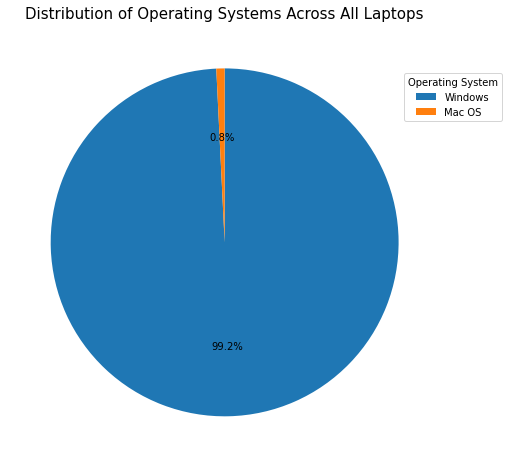

In [33]:
#sort values
laptops.sort_values('operating_system', ascending = False)
#set figure size
plt.figure(figsize=(10,8))
#construct pie chart
plt.pie(x = laptops.operating_system.value_counts(), autopct = '%1.1f%%',counterclock = False, startangle = 90)
#set legend for pie chart
plt.legend(title = 'Operating System', labels = laptops.operating_system.unique(), bbox_to_anchor=(0.9,0.9))
#set title
plt.title('Distribution of Operating Systems Across All Laptops', size = 15);

    - Windows operating systems dominate the laptop market because Mac operating system is exclusive to one brand - Apple
    - Most likely to buy a Windows laptops over Mac OS

In [75]:
#set base color to lower chart junk
base_color = sns.color_palette()[0]

#you can customise the function further to implement more informations 
#e.g instead of having a set title size you can change it from plot to plot
def CountPlot(df_col_name, figsize, y, title, title_size, xlabel, ylabel, min, max, incr):
    #will help determines the order of bars by amount by ascending or descending/.
    order = df_col_name.value_counts().index
    count = df_col_name.value_counts()
    amt_sizes = count.sum()
    
    plt.figure(figsize = figsize)
    sns.countplot(data = laptops, y = y, color = base_color, order= order)
    plt.title(label = title, fontsize = title_size)
    plt.xlabel(xlabel = xlabel, fontsize = 10)
    plt.ylabel(ylabel = ylabel, fontsize = 10)
    plt.xticks(np.arange(min, max, incr))

    # Logic to print the proportion text on the bars
    for i in range(count.shape[0]):
        counting = count[i]
        # Convert count into a percentage, and then into string
        pct_string = '{:0.1f}%'.format(100*counting/amt_sizes)
        # Print the string value along each bar. 
        plt.text(counting + 1, i, pct_string, va='center');

- What are the top 5 manufacturers producing the most laptops?

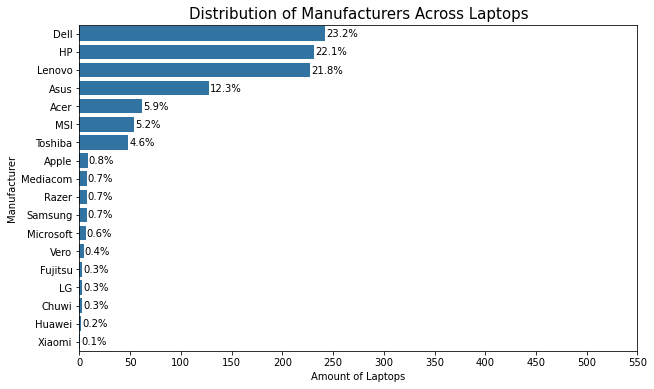

In [76]:
#use CountPlot function to plot the RAM sizes in dataset
CountPlot(laptops.manufacturer, 
          (10,6), 
          'manufacturer', 
          'Distribution of Manufacturers Across Laptops', 
          15,
          'Amount of Laptops', 
          'Manufacturer',  
          0, 
          600, 
          50)

    - Manufactureres with the most laptops in the market include Dell, HP, Lenovo, Asus, Acer as the top 5 manufacturers

- How are the laptop weights distributed?

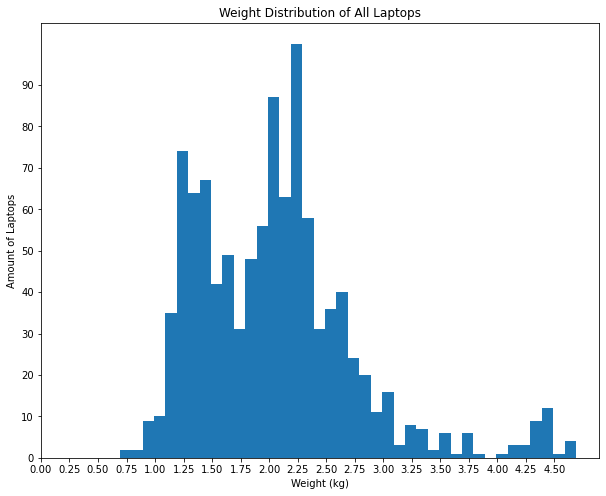

In [35]:
#create appropriate range of bins
bins = np.arange(min(laptops.weight), max(laptops.weight) + 0.05, 0.1)
#set figure size
plt.figure( figsize = (10,8))
#plot histogram of laptop weights
plt.hist(data = laptops, x = 'weight', bins = bins)
plt.xlabel('Weight (kg)')
plt.ylabel('Amount of Laptops')
plt.title('Weight Distribution of All Laptops')
plt.xticks(np.arange(0, laptops.weight.max(), 0.25));
plt.yticks(np.arange(0, laptops.weight.value_counts().max() +20, 10));

    - the histogram is skewed to the right with a bimodal distribution 
    - the highest peak between 2kg and 2.5kg and second highest peak between 1kg and 1.5kg
    - a weight of 2.20kg is the most popular in the market
    - a weight of 2.10kg is the second most popular in the market

- How are the laptop prices distributed?

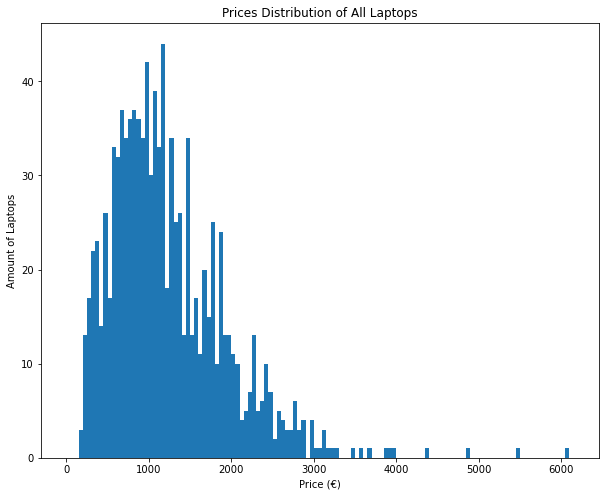

In [36]:
bins = np.arange(0, laptops.price.max() + 100, 50)
plt.figure(figsize = (10,8))
plt.hist(data = laptops, x = 'price', bins = bins);
plt.xlabel('Price (€)')
plt.ylabel('Amount of Laptops')
plt.title('Prices Distribution of All Laptops');

In [37]:
laptops[laptops.price == laptops.price.max()]

,manufacturer,model_name,category,screen_size,screen,ram,storage,operating_system,operating_system_version,weight,price,cpu_brand,cpu_speed,cpu_name,gpu_brand,gpu_name,screen_type
196,Razer,Blade Pro,Gaming,"17.3""",4K Ultra HD / Touchscreen 3840x2160,32GB,1TB SSD,Windows,10,3.49,6099.0,Intel,2.9,Core i7 7820HK,Nvidia,GeForce GTX 1080,Touchscreen


- Unimodal distribution that is skewed to the right
- Most laptops have a price lower than €2000
- The most expensive laptop costs €6099 for the Razer Blade Pro

- Does limiting the price range help the data in becoming normally distributed?

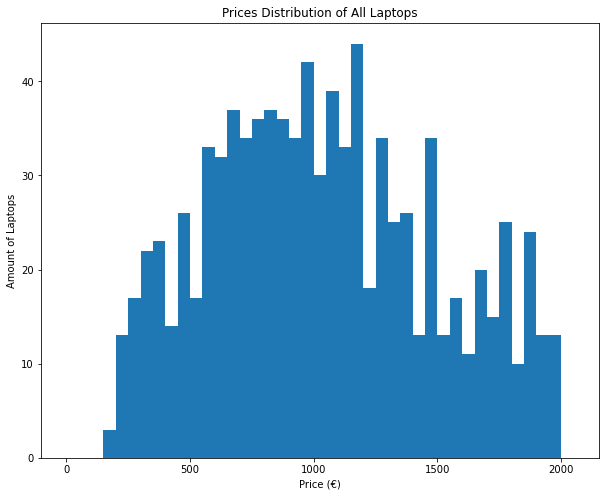

In [38]:
#creating dataset without higher prices being outliers
laptops_df = laptops[laptops.price <2000]

bins = np.arange(0, laptops_df.price.max() + 100, 50)
plt.figure(figsize = (10,8))
plt.hist(data = laptops_df, x = 'price', bins = bins);
plt.xlabel('Price (€)')
plt.ylabel('Amount of Laptops')
plt.title('Prices Distribution of All Laptops');

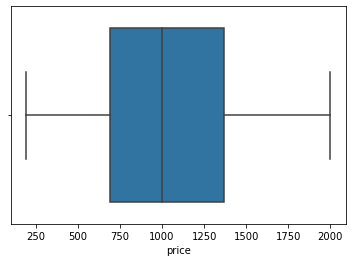

In [39]:
sns.boxplot(data=laptops_df, x='price' );

    - prices above 4th quartile can be regarded as outliers within the dataset
    - eliminating the outliers brings about a clearer way in interpretting the price data in different relationships

In [40]:
outliers = laptops[laptops.price> 2000].shape[0]

In [41]:
total = laptops.shape[0]

In [42]:
outlier_pct = outliers/total*100
outlier_pct

12.464046021093

- How are the laptop CPU speeds distributed?

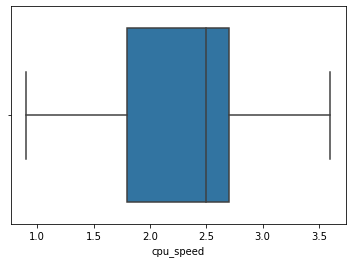

In [43]:
sns.boxplot(data=laptops_df, x='cpu_speed');

    - speeds are aggregate between 2.25GHz and 3.0GHz
    - 2.5GHz is the most common speed

- Let's see how laptop categories are distributed:

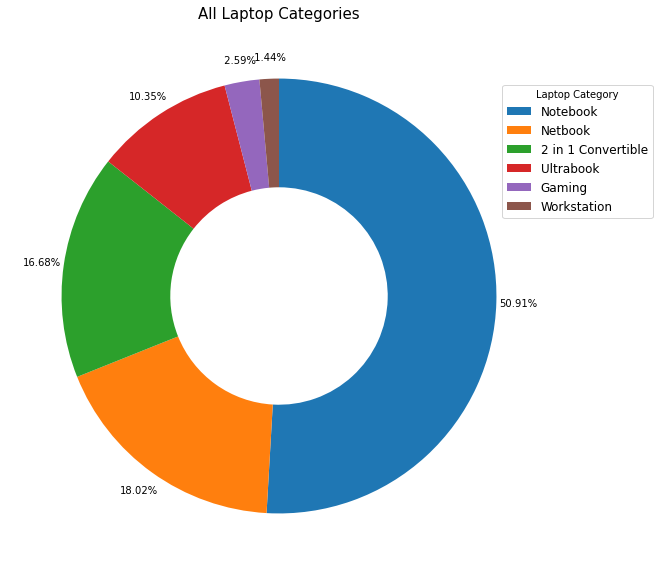

In [44]:
#create donut chart for laptop categories

donut_data = laptops.category.value_counts()
laptops.sort_values('category', ascending = False)
plt.figure(figsize=(12,10))
plt.pie(x = donut_data, pctdistance=1.1, autopct = '%5.2f%%', startangle = 90,counterclock = False, wedgeprops = {'width' : 0.5})
plt.legend(title = 'Laptop Category', labels = laptops.category.unique(), bbox_to_anchor=(0.9,0.9), fontsize = 12)
plt.title('All Laptop Categories', size = 15);

    - Notebooks are most commonly produced - making up half of the laptop dataset
    - Together, Notebooks, Netbooks and 2 In 1 Convertibles contribute to 75% of laptops

- What are the most manufactured screen sizes?

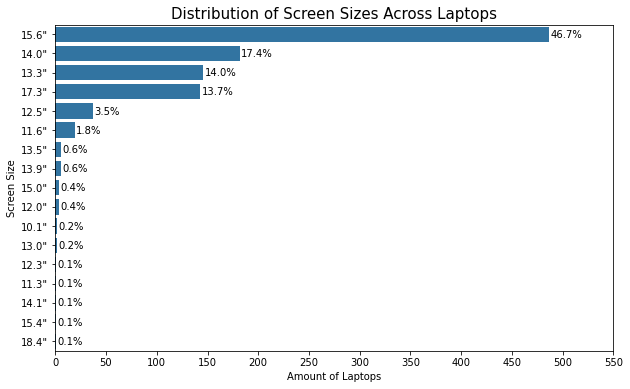

In [46]:
#use CountPlot function to plot the RAM sizes in dataset
CountPlot(laptops.screen_size, 
          (10,6), 
          'screen_size', 
          'Distribution of Screen Sizes Across Laptops', 
          15,
          'Amount of Laptops', 
          'Screen Size',  
          0, 
          600, 
          50)

    - 15.6" are the most popular screen size to producing almost half of the laptop market
    - top 4 laptop screen sizes will be 15.6", 14.0", 13.3" and 17.3"

- Which RAM size is ideal for most laptops?

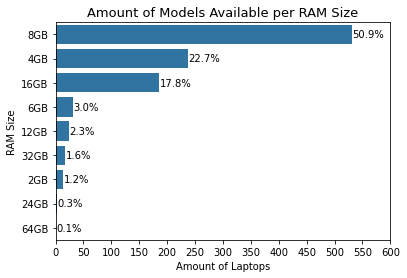

In [47]:
#use CountPlot function to plot the RAM sizes in dataset
CountPlot(laptops.ram, 
          (6,4), 
          'ram', 
          'Amount of Models Available per RAM Size',
          13,
          'Amount of Laptops', 
          'RAM Size',  
          0, 
          650, 
          50)

    - Most commonly used RAM size is 8GB
    - This calls the question if most laptop categories use 8GB - illustrating it's versatility

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - The operating systems will not affect the laptop much given the 99.2% Windows OS vs th 0.8% Mac OS
> - The laptops weights are mosts likely to range from 1kg to 2.5kg
> - 15.6" is a generalised popular laptop screen size to have by being distributed to 46.7% of the market
> - Together, Notebooks, Netbooks and 2 In 1 Convertibles contribute to 75% of market, the other 3 Categories are generally to a smaller target market

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It is interesting to see that 2GB of RAM being the lowest and slowest performing ram contributes to half of the laptops in the dataset

## 4. Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

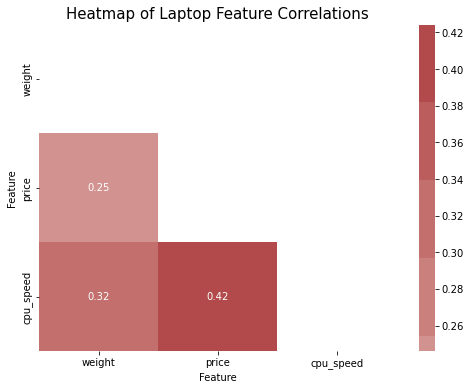

In [48]:
corr = laptops.corr()
#set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 6))

#generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
#use diverging colour map
cmap = sns.color_palette('vlag', 20)

#generate heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap = cmap, center = 0)
plt.title('Heatmap of Laptop Feature Correlations', fontsize = 15);
plt.xlabel('Feature')
plt.ylabel('Feature');

    - There is a weak corelations between price and weight therefore the weight will not have much influence on the price 
    - CPU speed has a moderate correlation indicating that the CPU Speed may affect price

In [49]:
#create new function to generate box plot for different variables
def BivariateBoxPlot(ymin, ymax, yincr, df, x, y, color, title, title_size, xlabel, xsize, ylabel, ysize):
    plt.yticks(np.arange(ymin, ymax, yincr))
    sns.boxplot(data = df, x = x, y = y, color = color)
    plt.title(label = title, fontsize = title_size)
    plt.xlabel(xlabel = xlabel, fontsize = xsize)
    plt.ylabel(ylabel = ylabel, fontsize = ysize);

In [82]:
#create new function to generate strip plot for different variables
def BivariateStripPlot(ymin, ymax, yincr, df, x, y, color, title, title_size, xlabel, xsize, ylabel, ysize):
    plt.yticks(np.arange(ymin, ymax, yincr))
    sns.stripplot(data = df, x = x, y = y, color = color)
    plt.title(label = title, fontsize = title_size)
    plt.xlabel(xlabel = xlabel, fontsize = xsize)
    plt.ylabel(ylabel = ylabel, fontsize = ysize);

- Let's compare the price distribution amongst the laptop categories using the full dataset and the dataset where price outliers are disregarded:

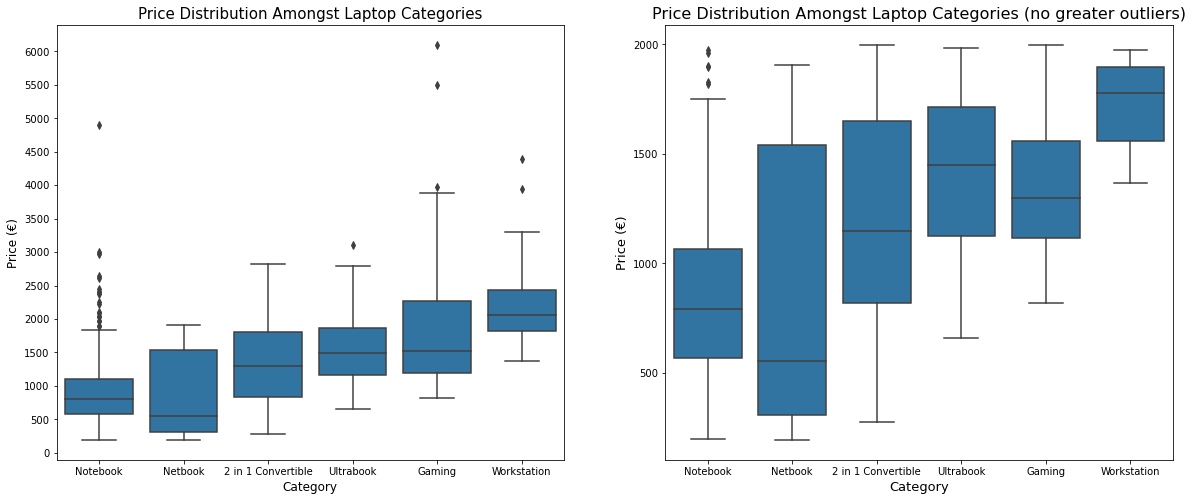

In [50]:
plt.figure(figsize = (20,8))
# subplot 1: boxplot of laptop category price distribution
plt.subplot(1, 2, 1)
BivariateBoxPlot(
                 0, 
                 6500, 
                 500, 
                 laptops, 
                 'category', 
                 'price', 
                 base_color, 
                 'Price Distribution Amongst Laptop Categories', 
                 15,
                 'Category',
                 12,
                 'Price (€)',
                 12)

# subplot 2: boxplot of laptop category price distribution without high priced laptop outliers
plt.subplot(1, 2, 2)
BivariateBoxPlot(
                 0, 
                 3000, 
                 500, 
                 laptops_df, 
                 'category', 
                 'price', 
                 base_color, 
                 'Price Distribution Amongst Laptop Categories (no greater outliers)', 
                 16,
                 'Category',
                 13,
                 'Price (€)',
                 13)

    - Notebooks and Netbooks have similar prices ranges but Netbooks have a lower median - they will more likely be priced lower
    - Gaming laptops are the most expensive range of laptops, followed closely by Workstation laptops which has the highest minimum prices of all categories

- Which laptop categories do the top 5 manufacturers contribute to?

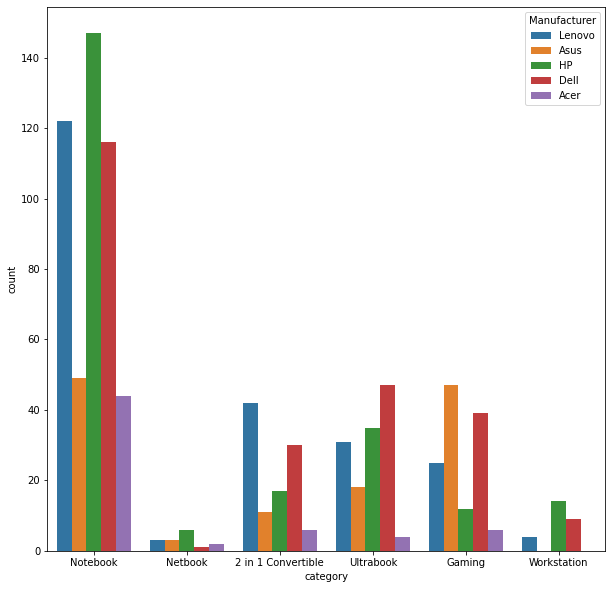

In [51]:
#separate dataframe for the top 5 manufacturers
top5_manus = laptops[(laptops.manufacturer == 'Dell')|(laptops.manufacturer == 'HP')|(laptops.manufacturer == 'Lenovo')|(laptops.manufacturer == 'Asus')|(laptops.manufacturer == 'Acer')]

plt.figure(figsize = (10,10))
sns.countplot(data = top5_manus, x = 'category', hue = 'manufacturer')
plt.legend(loc = 'upper right', title = 'Manufacturer');

    - All of the manufacturers have models in categories except Workstation
    - Lenovo, HP and Dell (Top 3 laptops) provide Workstation laptops while Asus and Acer do not

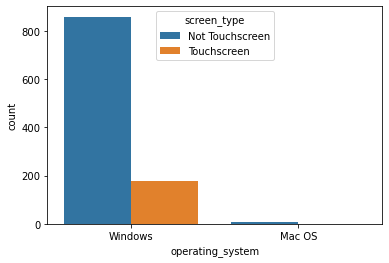

In [52]:
#create count plot for operating systems with screen type hue
ax = sns.countplot(data = laptops, x = 'operating_system', hue = 'screen_type')

    - Mac OS laptops offer no touchscreen options compared to Windows offering a selection of both

- Is there a significant affect created by the laptop RAM size on weight, price and the CPU speed?

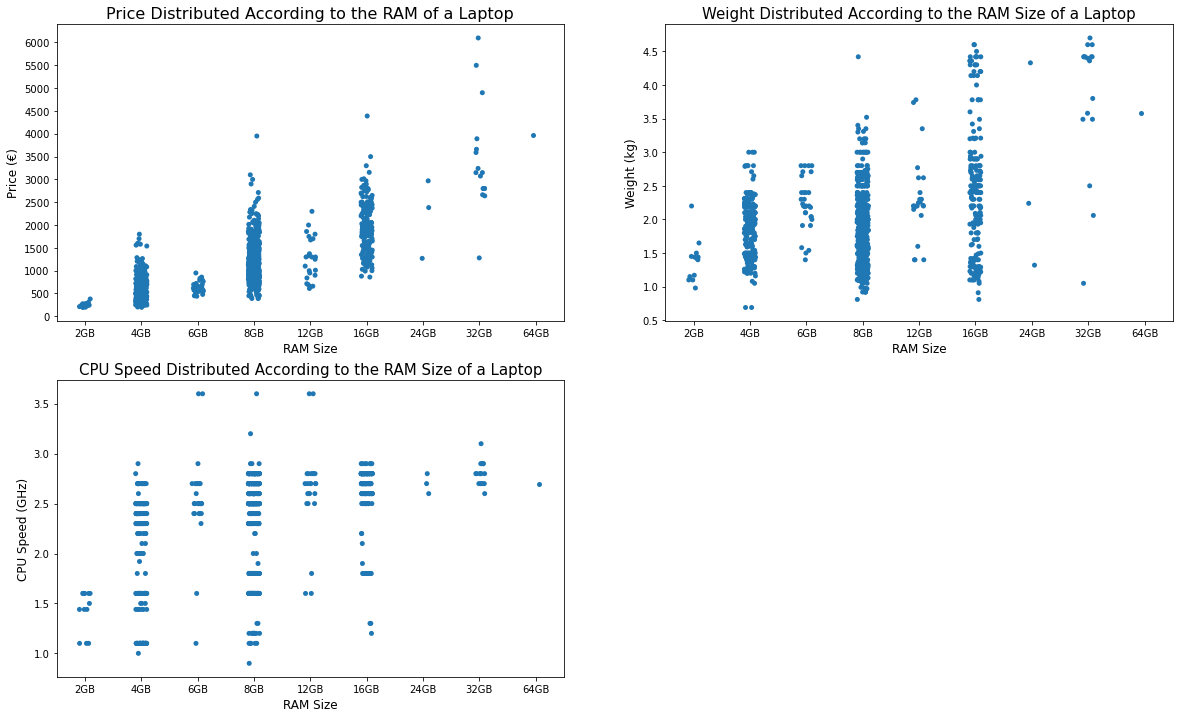

In [83]:
plt.figure(figsize = (20,12))

plt.subplot(221)
BivariateStripPlot(0, 
                 laptops.price.max() + 500, 
                 500, 
                 laptops, 
                 'ram', 
                 'price', 
                 base_color, 
                 'Price Distributed According to the RAM of a Laptop', 
                 16,
                 'RAM Size',
                 12,
                 'Price (€)',
                 12)
plt.subplot(222)
BivariateStripPlot(0, 
                 laptops.weight.max() +0.5, 
                 0.5, 
                 laptops, 
                 'ram', 
                 'weight', 
                 base_color, 
                 'Weight Distributed According to the RAM Size of a Laptop', 
                 15,
                 'RAM Size',
                 12,
                 'Weight (kg)',
                 12)

plt.subplot(223)
BivariateStripPlot(0, 
                 laptops.cpu_speed.max() +0.5, 
                 0.5, 
                 laptops, 
                 'ram', 
                 'cpu_speed', 
                 base_color, 
                 'CPU Speed Distributed According to the RAM Size of a Laptop', 
                 15,
                 'RAM Size',
                 12,
                 'CPU Speed (GHz)',
                12)



    - The RAM size of a laptop contributed to the weight
    - As the RAM size increase the data distribution of the weight of the laptop tends to increase too
    - prices increase as RAM size increase
    - positive relationship between RAM size and price

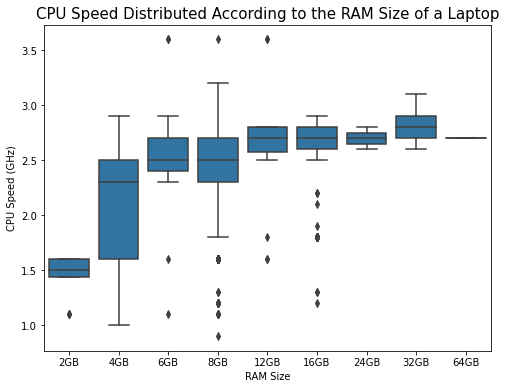

In [55]:
plt.figure(figsize = (8,6))
#use the BivariateBoxPlot function to plot the cpu speed of ram
BivariateBoxPlot(0, 
                 laptops.cpu_speed.max() +0.5, 
                 0.5, 
                 laptops, 
                 'ram', 
                 'cpu_speed', 
                 base_color, 
                 'CPU Speed Distributed According to the RAM Size of a Laptop', 
                 15,
                 'RAM Size',
                 10,
                 'CPU Speed (GHz)',
                10)

In [56]:
#ordering data by the screen size
screen_size_ordered = laptops.copy()
#created a copy of screen_size column
screen_size_ordered['screen_size_num'] = screen_size_ordered['screen_size']
#remove all letters from new column
screen_size_ordered['screen_size_num'] = screen_size_ordered['screen_size_num'].str.replace('"', '')

#convert the screen_size_num column to integers
screen_size_ordered.screen_size_num = screen_size_ordered.screen_size_num.astype(float)

#order the dataframe according to the screen_size_num
screen_size_ordered.sort_values(by = 'screen_size_num', inplace = True, ascending = True)
#drop the new column since the screen size column will be ordered correctly 
screen_size_ordered.drop(columns = 'screen_size_num', inplace = True)

In [57]:
#create new function for pointplots
def BivariatePointPlot(figsize, title, titlesize, df, x, y, color, xlabel,  xsize, ylabel, ysize):
    plt.figure(figsize = figsize)
    plt.title(label = title, fontsize = titlesize)
    sns.pointplot(data=df, x=x, y=y, color = color)
    plt.ylabel(xlabel, fontsize = xsize)
    plt.xlabel(ylabel, fontsize = ysize);

- Let's see how price and weight of the laptop are affected by screen size:

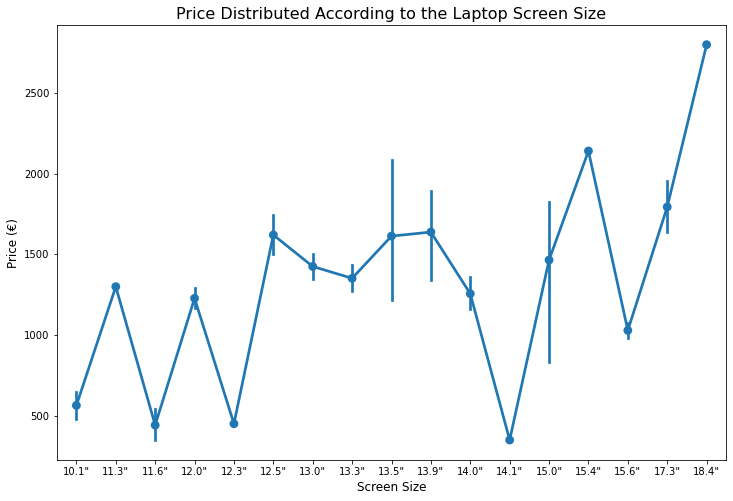

In [58]:
BivariatePointPlot((12,8), 
          'Price Distributed According to the Laptop Screen Size', 
          16, 
          screen_size_ordered, 
          'screen_size', 
          'price', 
          base_color, 
          'Price (€)', 
          12, 
          'Screen Size', 
          12)

    - prices tend to increase as screen size increase
    - screen size such as 11.6", 12.3", 14.1" and 15.6" may be distributed at lower prices for versatility in laptop categories

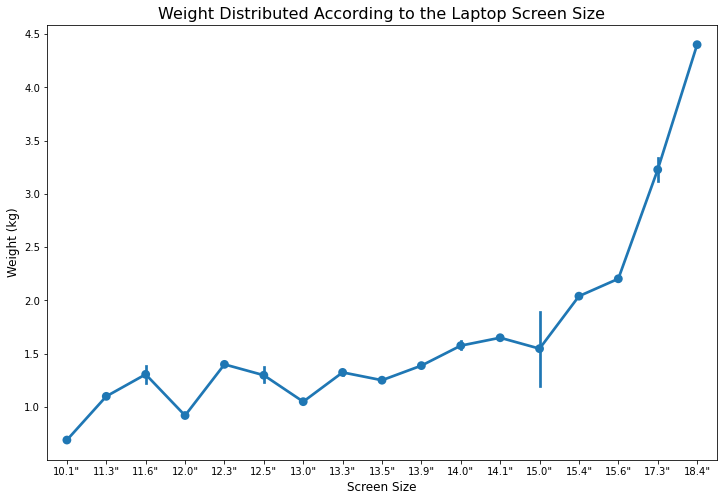

In [59]:
BivariatePointPlot((12,8), 
          'Weight Distributed According to the Laptop Screen Size', 
          16, 
          screen_size_ordered, 
          'screen_size', 
          'weight', 
          base_color, 
          'Weight (kg)', 
          12, 
          'Screen Size', 
          12)

    - screen size commonly has an affect on the weight
    - as the screen size increase the weight will generally increase too

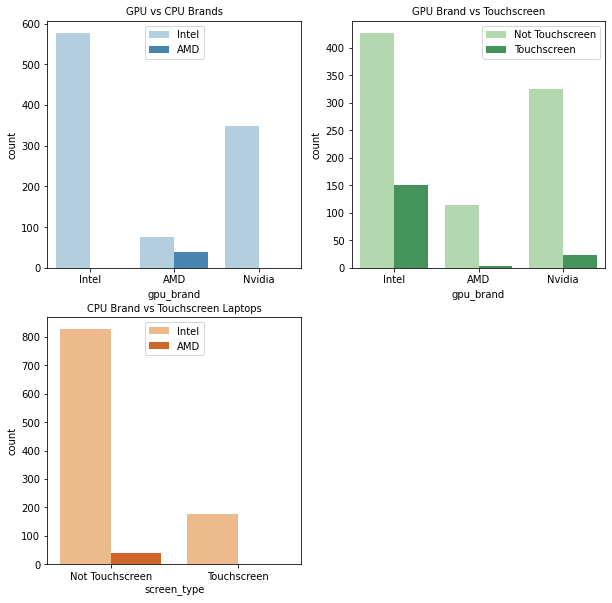

In [60]:
#comparing the interaction between cpu and gpu brands with screen type 
plt.figure(figsize = [10, 10])

# subplot 1: gpu_brand vs cpu_brand
ax1 = plt.subplot(2, 2, 1)
plt.title('GPU vs CPU Brands', fontsize = 10)
sns.countplot(data = laptops, x = 'gpu_brand', hue = 'cpu_brand', palette = 'Blues')
ax1.legend(ncol = 1)

# subplot 2: gpu_brand vs. touchscreen
ax2 = plt.subplot(2, 2, 2)
plt.title('GPU Brand vs Touchscreen', fontsize = 10)
sns.countplot(data = laptops, x = 'gpu_brand', hue = 'screen_type', palette = 'Greens')
ax2.legend(ncol = 1) 

# subplot 3: ram vs. touchscreen
ax3 = plt.subplot(2,2, 3)
plt.title('CPU Brand vs Touchscreen Laptops', fontsize = 10)
sns.countplot(data = laptops, x = 'screen_type', hue = 'cpu_brand', palette = 'Oranges')
ax3.legend(ncol = 1)

plt.show()

In [61]:
gpus = laptops.gpu_brand.unique()

for gpu in gpus:
    print('GPU Brand:', gpu, '\n Screen Type:', laptops[(laptops.gpu_brand == gpu) & (laptops.screen_type == 'Not Touchscreen')]['screen_type'].value_counts() , '\n Screen Type:', laptops[(laptops.gpu_brand == gpu) & (laptops.screen_type == 'Touchscreen')]['screen_type'].value_counts(), '\n')

GPU Brand: Intel 
 Screen Type: Not Touchscreen    428
Name: screen_type, dtype: Int64 
 Screen Type: Touchscreen    150
Name: screen_type, dtype: Int64 

GPU Brand: AMD 
 Screen Type: Not Touchscreen    114
Name: screen_type, dtype: Int64 
 Screen Type: Touchscreen    3
Name: screen_type, dtype: Int64 

GPU Brand: Nvidia 
 Screen Type: Not Touchscreen    325
Name: screen_type, dtype: Int64 
 Screen Type: Touchscreen    23
Name: screen_type, dtype: Int64 



In [62]:
cpus = laptops.cpu_brand.unique()

for cpu in cpus:
    print('CPU Brand:', cpu, '\n Screen Type:', laptops[(laptops.cpu_brand == cpu) & (laptops.screen_type == 'Not Touchscreen')]['screen_type'].value_counts() , '\n Screen Type:', laptops[(laptops.cpu_brand == cpu) & (laptops.screen_type == 'Touchscreen')]['screen_type'].value_counts(), '\n');

CPU Brand: Intel 
 Screen Type: Not Touchscreen    827
Name: screen_type, dtype: Int64 
 Screen Type: Touchscreen    176
Name: screen_type, dtype: Int64 

CPU Brand: AMD 
 Screen Type: Not Touchscreen    40
Name: screen_type, dtype: Int64 
 Screen Type: Series([], Name: screen_type, dtype: Int64) 



#### GPU vs CPU Brands:
- Intel CPUs will be distributed between Intel, AMD and Nvidia GPU brands
- AMD CPUs will only have AMD GPUs

#### GPU Brand vs Touchscreen:
- All GPU brands have a majority of laptops that are not touchscreen
- Intel GPU laptops contribute the most to touchscreen laptops

#### CPU Brand vs Touchscreen:
- Intel CPUs have a split of 176 touchscreen laptops and 827 laptops that are not touchscreen
- AMD CPUs are available 40 laptops across dataset and no laptops are touchscreen

- top 4 laptop screen sizes will be 15.6", 14.0", 13.3" and 17.3"
Which laptop categories possess these sizes?

In [63]:
laptops[(laptops.screen_size == '15.6"')|(laptops.screen_size == '14.0"')|(laptops.screen_size == '13.3"')|(laptops.screen_size == '17.3"')]['category'].unique()

<StringArray>
['Notebook', '2 in 1 Convertible', 'Gaming', 'Ultrabook', 'Workstation']
Length: 5, dtype: string

    - Unsurprisingly, Netbooks do not have screens of 15.6" since they tend to be much smaller than most laptops for it's own convient aspect

- How do the screen sizes vary in each laptop category?

In [64]:
#define new function that can be usede for future subplots
def SubPlots(list,figsize, rows, cols, index, df, df_col_name, x, hue, ncol, title, title_size, xlabel,xsize, ylabel, ysize):
    for cat in list:
        plt.figure(figsize = figsize)
        ax1 = plt.subplot(rows, cols, index)
        sns.countplot(data = df[df_col_name == cat], x = x, color = base_color)
        plt.title(label = title + ' For ' + cat + ' Laptops', fontsize = title_size)
        plt.xlabel( xlabel, fontsize = xsize)
        plt.ylabel( ylabel, fontsize = ysize)

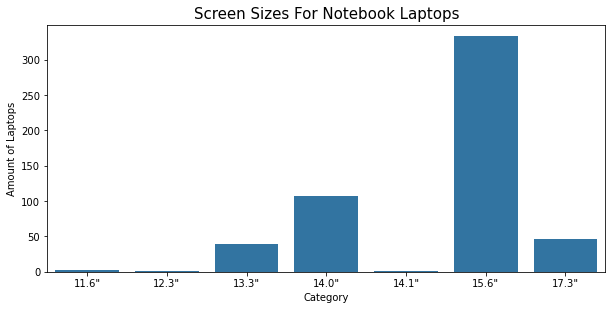

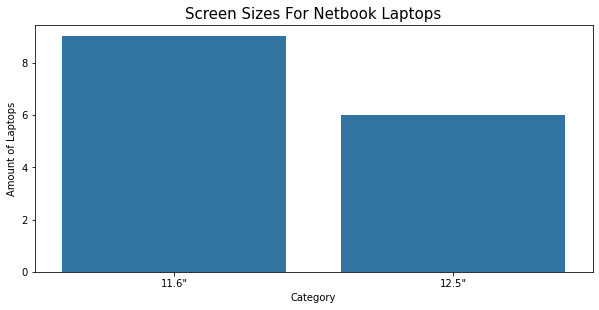

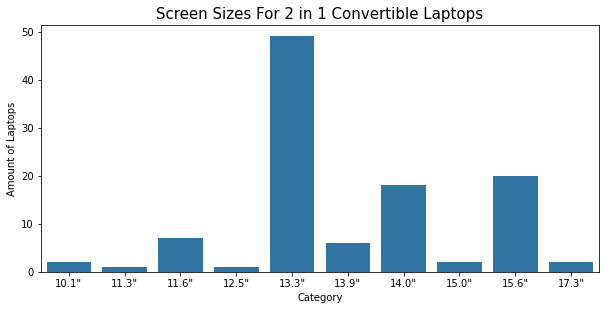

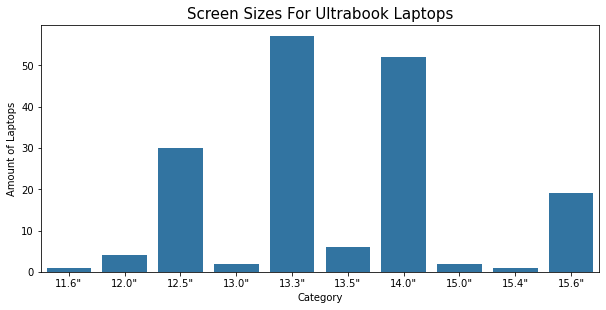

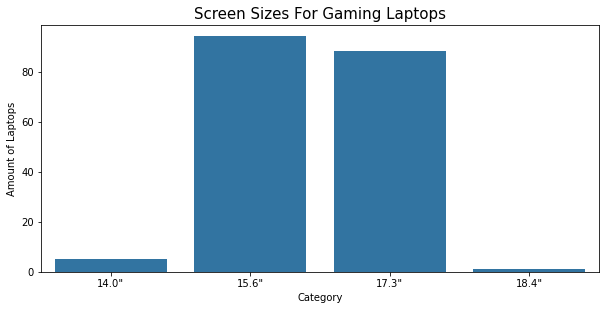

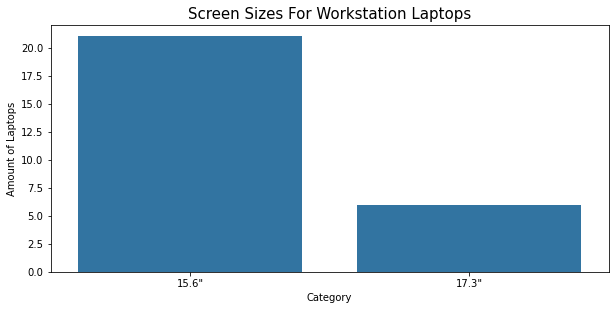

In [65]:
cats = ['Notebook', 'Netbook', '2 in 1 Convertible', 'Ultrabook', 'Gaming', 'Workstation']

SubPlots(cats,
         [10,10], 
         2, 
         1,
         1, 
         screen_size_ordered,
         screen_size_ordered.category, 
         'screen_size', 
         'category', 
         1, 
         'Screen Sizes',
         15,
         'Category',
         10,
         'Amount of Laptops',
         10)

     - Notebooks, 2 In 1 Convertibles and Ultrabooks have a wide variety of screen sizes
     - Workstation laptops split between 15.6" and 17.3"
     - Netbooks are split between 11.6" and 12.5"
     - Gaming is split between 15.6", 17.3", 14.0", 18.4"

- Similarly, let's see which RAM sizes are present in each category:

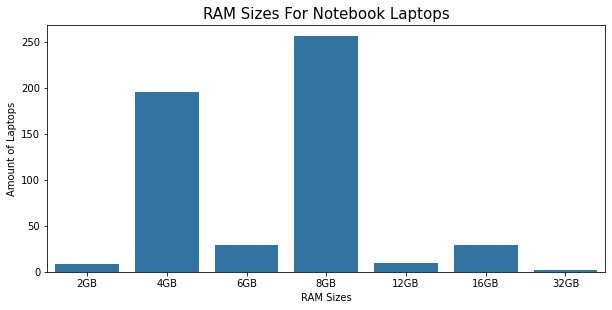

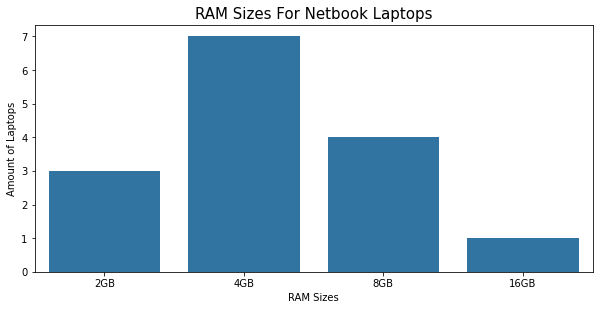

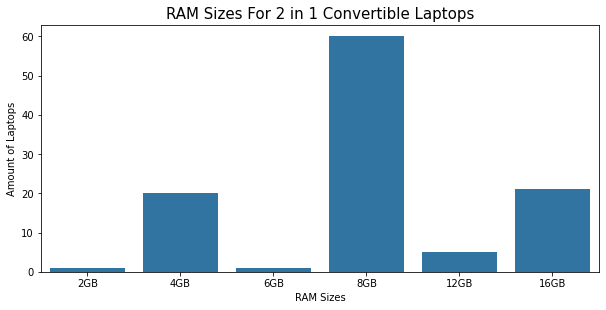

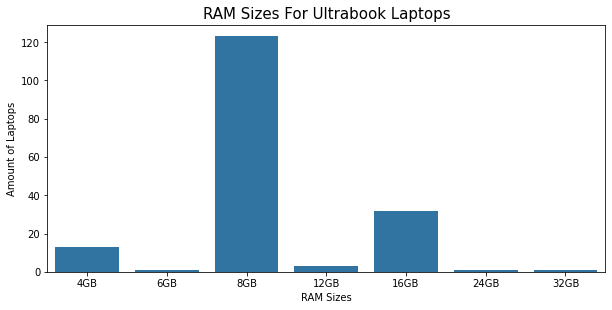

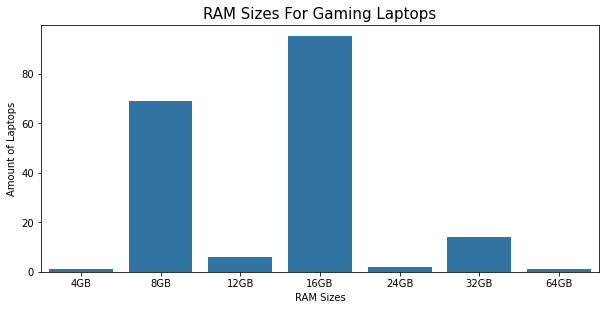

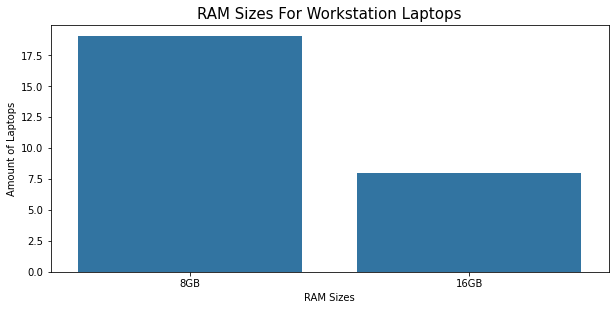

In [66]:
SubPlots(cats,
         (10,10), 
         2, 
         1,
         1, 
         laptops,
         laptops.category, 
         'ram', 
         'category', 
         1, 
         'RAM Sizes',
         15,
         'RAM Sizes',
         10,
         'Amount of Laptops',
         10)

    - Notebooks are most commonly going to have a RAM size of 4GB or 8GB
    - Gaming and 2 In 1 Convertible laptops tend to have 8GB or 16GB RAM
    - Ultrabooks veer towards 8GB RAM
    - Netbooks have 2Gb, 4GB or 8GB RAM
    - Gaming laptops are the only ones with 64GB RAM

- Which laptop categories are touchscreen?

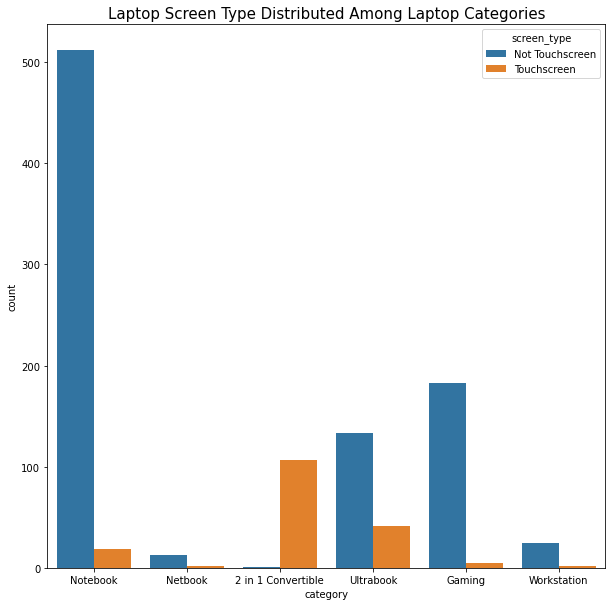

In [67]:
plt.figure(figsize = (10,10))
sns.countplot(data = laptops, x = 'category', hue = 'screen_type')
ax1.legend(ncol = 1, title = 'Screen Type')
plt.title('Laptop Screen Type Distributed Among Laptop Categories', fontsize = 15)
plt.show()

    - touchscreens are distributed between all categories, predominantly in 2 In 1 Convertibles which are known for having touchscreen capability

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - CPU speed 
> - The bigger the RAM the higher the laptop could weigh
> - AMD CPUs will only have AMD GPUs while Intel CPUs will be distributed between Intel, AMD and Nvidia GPU brands
> - Intel GPU laptops contribute the most to touchscreen laptops
- Most Commonly used RAM Size for each Laptop Category:
> Notebooks: 8GB <br>
> Netbooks: 4GB <br>
> 2 In 1 Convertibles: 8GB <br>
> Ultrabooks: 8GB <br>
> Gaming: 16GB <br>
> Workstation: 8GB <br>
-Most Commonly used Screen Size(s) for each Laptop Category:
> Notebooks: 15.6" <br>
> Netbooks: 11.6" and 12.5" <br>
> 2 In 1 Convertibles: 13.3" <br>
> Ultrabooks: 13.3" and 14.0" <br>
> Gaming: 15.6" and 17.3" <br>
> Workstation: 15.6" <br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Mac OS laptops do not have touchscreens available
> - There are 2 In 1 Convertible laptops that are not touchscreen

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

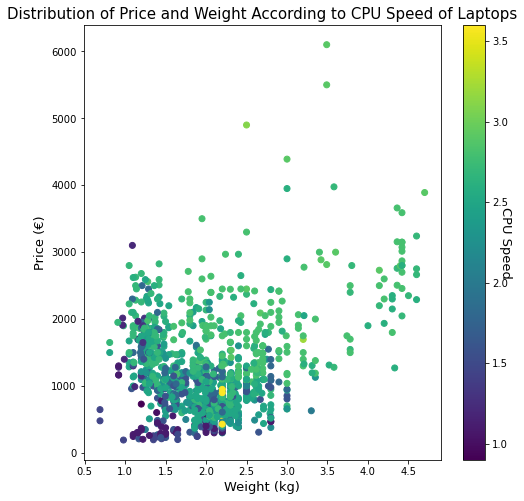

In [68]:
plt.figure(figsize = [8,8])
plt.scatter(data = laptops, x = 'weight', y = 'price', c = 'cpu_speed')
cbar = plt.colorbar()
cbar.ax.set_ylabel(ylabel = 'CPU Speed', rotation=270, fontsize = 13)
plt.ylabel('Price (€)', fontsize = 13)
plt.xlabel('Weight (kg)', fontsize = 13)
plt.title('Distribution of Price and Weight According to CPU Speed of Laptops', fontsize = 15);

    - high speed processors have a mid range weight and low to mid price range
    - low speed processes generall have low to mid range weight and lower price

- let's compare the CPU brands on a scaterplot of weight and price

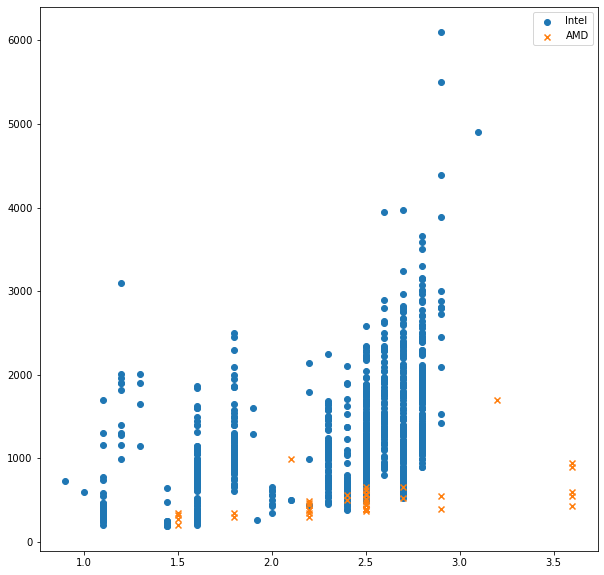

In [69]:
os_markers = [['Intel', 'o'], ['AMD', 'x']]
plt.figure(figsize = (10,10))
for cat, marker in os_markers:
    os = laptops[laptops.cpu_brand == cat]
    plt.scatter(data = os, x = 'cpu_speed', y = 'price', marker = marker)
plt.legend(['Intel', 'AMD']);

In [70]:
laptops[laptops.price == laptops.price.max()]['cpu_speed']

196    2.9
Name: cpu_speed, dtype: float64

    - CPU speeds vary across prices
    - Laptops using an AMD CPU are most likely going to cost less than €2000
    - The highest CPU speed of 3.6GHz has an AMD processor is marketed ranging from 597.57 to 899 whereas the most expensive laptop at 6099 has an Intel processor and a speed of less that 2.90Hz
    - AMD processors are marketed at a lower price but giving a good range of speeds

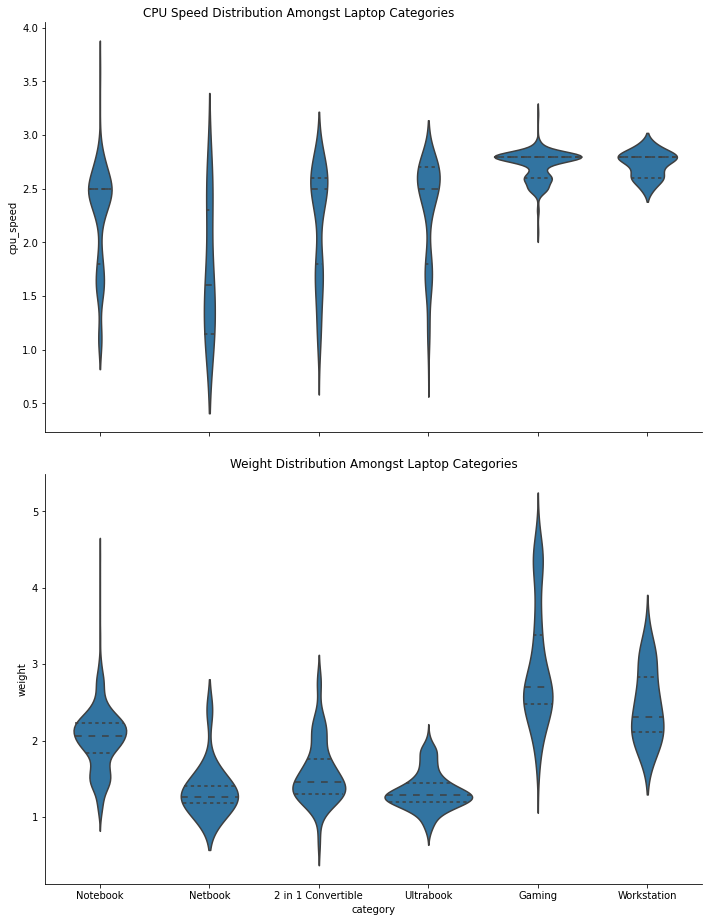

In [71]:
#plot pairgrid with cpu speed, weight and category columns

g = sns.PairGrid(data = laptops, y_vars = ['cpu_speed', 'weight'], x_vars = ['category'])
g.fig.suptitle('CPU Speed Distribution Amongst Laptop Categories')
plt.title('Weight Distribution Amongst Laptop Categories')
g.map(sns.violinplot, inner = 'quartile', color = base_color)
g.fig.set_size_inches(14,14)

    - Gaming and Workstation laptops require higher CPU speeds in order to function accordingly for user efficiency
    - Gaming laptops will tend to be the bulklier and has the highest weighing laptop in the data
    - Ultrabooks, netbooks and 2 In 1 Convertibles should have weights lower than other laptops for their diverse features
       > Netbooks are small-screened laptops
       > 2 In 1 Convertibles should be lightweight so that is portable for the use as a tablet
       >  Ultrabooks are known for its lightweight functionality
    - Ultrabooks, netbooks and 2 In 1 Convertibles also offer a range of lower processor speeds making them slower in functionality
    - Notebooks are designed to have a range of processor speeds and weights with the bulk of the weight ranging around 2kg

- let's compare the laptop manufacturers price distribution with the CPU brands and GPU brands using the laptops_df dataframe which will exclude the price outliers from before to have a better visual of the ditributions

In [72]:
#create a function so that the plot can be re-applied with any variable
def MultivariatePointPlot(figsize, chart_title, title_size, df, x, y, hue, dodge, leg_title, min,max, incr, xlabel, ylabel, x_size,y_size):
    plt.figure(figsize = figsize)
    plt.title(label = chart_title, fontsize = title_size)
    ax = sns.pointplot(data = df, x = x, y = y, hue = hue,
                  dodge = dodge, linestyles = "")
    ax.legend(title = leg_title)
    plt.yticks(np.arange(min, max, incr))
    plt.xlabel(xlabel, fontsize = x_size)
    plt.ylabel(ylabel, fontsize = y_size);

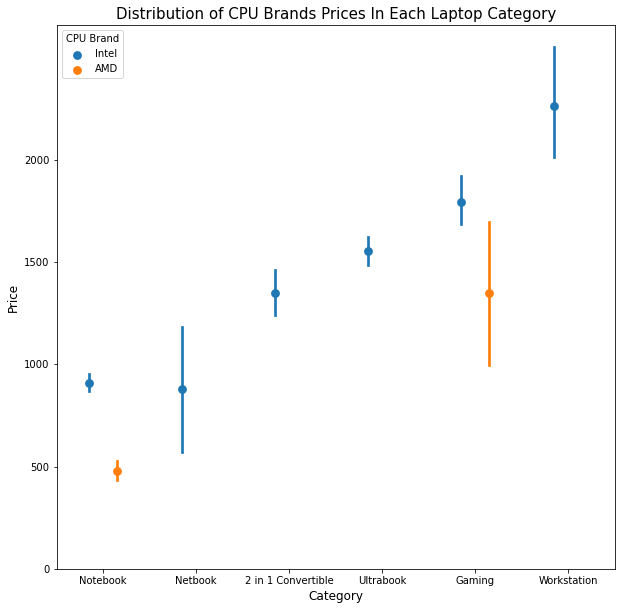

In [73]:
MultivariatePointPlot([10,10], 
                       'Distribution of CPU Brands Prices In Each Laptop Category',
                       15, 
                       laptops, 
                       'category', 
                       'price', 
                       'cpu_brand', 
                       0.3, 
                       'CPU Brand', 
                       0, 
                       laptops_df.price.max() + 500, 
                       500, 
                       'Category', 
                       'Price', 
                       12, 
                       12)

    - AMD CPUs are only used in notebooks and gaming laptops
    - AMD CPUs are used in cheaper laptops than most Intel CPU laptops

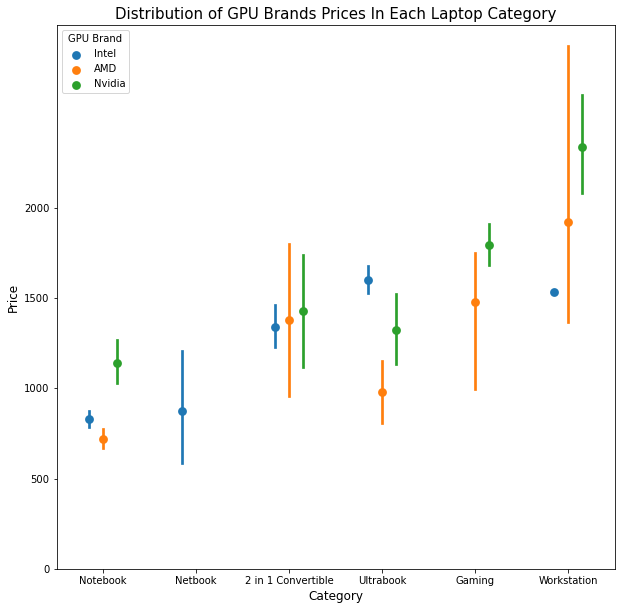

In [74]:
MultivariatePointPlot([10,10], 
                       'Distribution of GPU Brands Prices In Each Laptop Category',
                       15, 
                       laptops, 
                       'category', 
                       'price', 
                       'gpu_brand', 
                       0.3, 
                       'GPU Brand', 
                       0, 
                       laptops_df.price.max() + 500, 
                       500, 
                       'Category', 
                       'Price', 
                       12, 
                       12)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - CPU speed varies across laptop categories and their function to the user
> - there is not direct relationships between the numerical variables:
     - high speed processors have a mid range weight and low to mid price range
     - low speed processes generall have low to mid range weight and lower price

### Were there any interesting or surprising interactions between features?

> - AMD CPUs are only used in notebooks and gaming laptops
> - CPU speeds vary across prices

## Conclusions

The weight of a laptop is dependant on the size of the RAM. The higher the RAM, the higher the weight typically will be for the laptop. It brings no surprise that Gaming laptops would have a higher range and be the highest weight given their need for bigger RAM size that should be at least 8GB but can be as high as 64GB. Ultrabooks, netbooks and 2 In 1 Convertibles should have weights lower than other laptops for their diverse features.
 
Gaming and Workstation laptops tend to range at a higher speeds than the other categories. They range from 2GHz to 3.5GHz because it is best for both categories to be higher performing laptops. Gaming needs to have fast processing times to suit the user and workstations are highly used for intense process such as 3D animation and video editing. Whereas the remaining categories can span between low and high usage that fit the users day to day processes that are not as intense. Ultrabooks, netbooks and 2 In 1 Convertibles also offer a range of lower processor speeds making certain laptops lower in functionality.

Netbook, 2 In 1 Convertible, Ultrabook and Workstation laptops only make use of the Intel CPU brand. Notebook and Gaming laptops are split between both Intel and AMD processors with the lower priced laptops of the two categories using AMD processors. Intel CPUs will be distributed between Intel, AMD and Nvidia GPU brands while AMD CPUs will only have AMD GPUs.

The RAM of a laptop works hand in hand with the CPU speed. They both help the laptop control processes at a faster rate if the RAM is higher. Given the versatility of a Notebook, the RAM could range from 2GB to 32GB depending on the functionality of the Notebook to the user. CPU Speeds are influenced by the RAM size. RAM sizes of 6GB commonly have a CPU speed range of 1.5GHz to 3.0 GHz. 8GB RAM laptops can range from less than 1GHz.

Screen sizes are more preferential to the user and their use of a laptop. Laptops that are 15.6" and less in screen sizes would have a good portability if needing to transport the laptop while the higher screen sizes are kept for a desktop purposes. Screen size impact the weight of the laptop, the larger the screen therefore the weight will increase too. There is some impact on price from screen sizes with exceptions from 11.6", 12.3" and 14.1" laptops.

The price of a laptop is influenced by the RAM size. As the RAM size increases the price will slowly increases too. This can be reflected by the RAM contribution to weight of the laptop that will indirectly have the weight influence the price. The category a laptop falls in influences the prices. Notebooks and 2 In 1 Convertibles vary greatly in price. All Netbooks are lower than €2000. Gaming and Workstation laptops are commonly priced higher than other categories with Gaming laptops contributing to the highest price with the Razer laptop.

#### Considerations:
- The data was last updated in July 2019. Since then the laptop markets may have changed especially given the COVID-19 pandemic starting 2020
- A rating system could help in determining the best laptop according to consumer opinions from experience
- There are laptop specifications such as USB ports and other adaptors that will skew the current data

References:
1. Source for dataset download:
> https://github.com/37Degrees/DataSets/blob/master/laptops.csv

- Used for extended knowledge on laptops and their functions:
2.  https://www.avast.com/c-ssd-vs-hdd#:~:text=SSDs%20are%20faster%2C%20more%20durable,about%20as%20reliable%20as%20HDDs.
3. https://www.reviewed.com/laptops/features/what-are-the-different-kinds-of-laptops
4. https://www.minitool.com/news/what-is-a-good-processor-speed.html